In [2]:
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read your point shapefiles (Flooded and Non-Flooded locations)
points = gpd.read_file('/home/jupyter-edufitimana/Data/flooding_data.shp')
kigali = gpd.read_file('/home/jupyter-edufitimana/Data/boundary_kigali.shp')

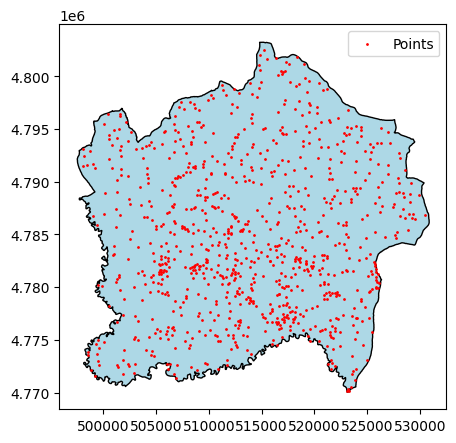

In [4]:
# Create a new figure
fig, ax = plt.subplots(figsize=(5, 5))

# Plot districts
kigali.plot(ax=ax, color='lightblue', edgecolor='black')
# Plot points
points.plot(ax=ax, color='red', markersize=1)

# Add legend
ax.legend(['Points'])
plt.show()

In [5]:
# Add new columns for the predictive features
features = ['Elevation', 'Slope', 'Aspect', 'NDVI', 'NDBI', 'Drainage', 'Land cover', 'Rainfall']
for feature in features:
    points[feature] = np.nan  # Initialize with NaN instead of 0 to avoid misleading default values


In [6]:
# Read the raster files
DEM_raster = rio.open('/home/jupyter-edufitimana/Data/elevation.tif')
DEM_arr = DEM_raster.read(1)

Slope_raster = rio.open('/home/jupyter-edufitimana/Data/slope.tif')
Slope_arr = Slope_raster.read(1)

Aspect_raster = rio.open('/home/jupyter-edufitimana/Data/aspect.tif')
Aspect_arr = Aspect_raster.read(1)

ndvi_raster = rio.open('/home/jupyter-edufitimana/Data/ndvi.tif')
ndvi_arr = ndvi_raster.read(1)

ndbi_raster = rio.open('/home/jupyter-edufitimana/Data/ndbi.tif')
ndbi_arr = ndbi_raster.read(1)

drainage_raster = rio.open('/home/jupyter-edufitimana/Data/drainage.tif')
drainage_arr = drainage_raster.read(1)

#lithology_raster = rio.open('/home/jupyter-edufitimana/Data/lithology.tif')
#lithology_arr = lithology_raster.read(1)

landcover_raster = rio.open('/home/jupyter-edufitimana/Data/land_cover.tif')
landcover_arr = landcover_raster.read(1)

rainfall_raster = rio.open('/home/jupyter-edufitimana/Data/rainfall.tif')
rainfall_arr = rainfall_raster.read(1)

<AxesSubplot: >

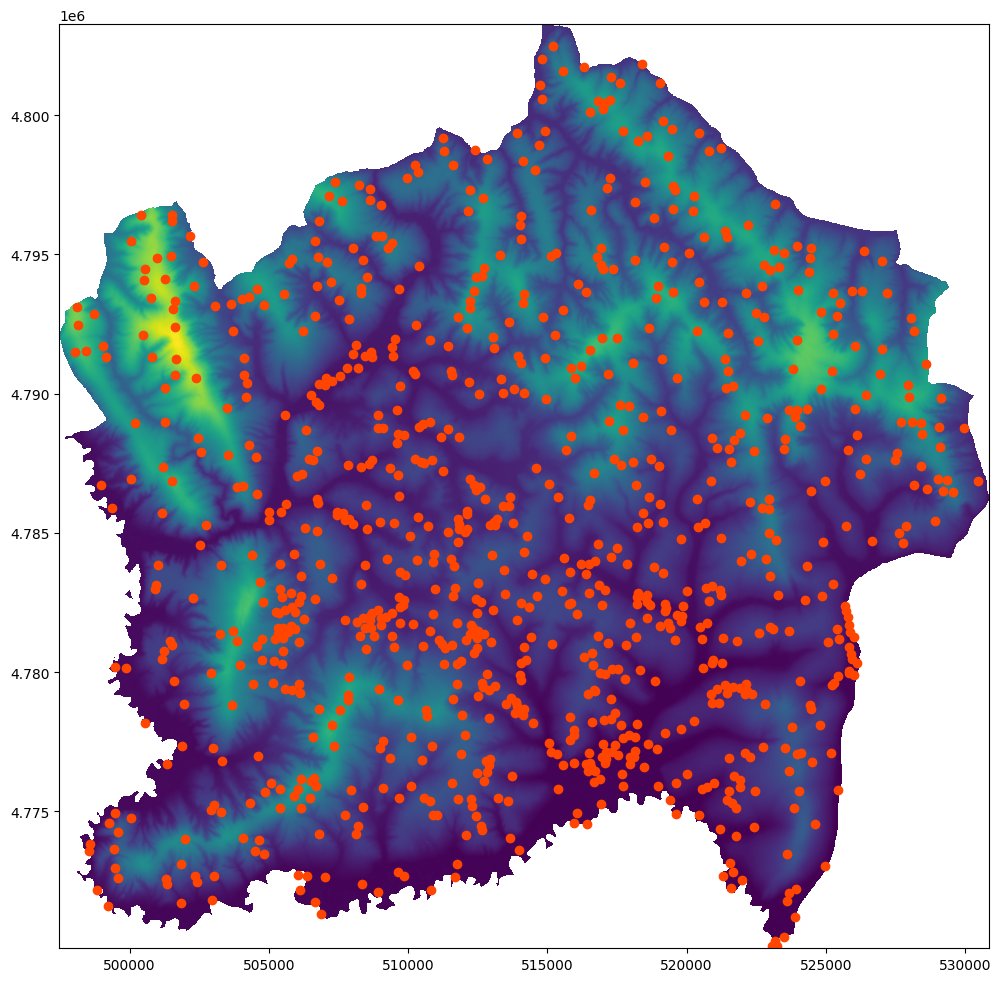

In [7]:
#show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(12,12))
points.plot(ax=ax, color='orangered')
show(DEM_raster, ax=ax)

In [8]:
# Extracting the raster values to the points shapefile
for index, row in points.iterrows():
    longitude = row['geometry'].x
    latitude = row['geometry'].y
    
    try:
        rowIndex, colIndex = DEM_raster.index(longitude, latitude)

        # Extract the raster values at the point location, but only if the index is valid
        if 0 <= rowIndex < DEM_arr.shape[0] and 0 <= colIndex < DEM_arr.shape[1]:
            points.at[index, 'Elevation'] = DEM_arr[rowIndex, colIndex]
            points.at[index, 'Slope'] = Slope_arr[rowIndex, colIndex]
            points.at[index, 'Aspect'] = Aspect_arr[rowIndex, colIndex]
            points.at[index, 'NDVI'] = ndvi_arr[rowIndex, colIndex]
            points.at[index, 'NDBI'] = ndbi_arr[rowIndex, colIndex]
            points.at[index, 'Drainage'] = drainage_arr[rowIndex, colIndex]
            #points.at[index, 'Lithology'] = lithology_arr[rowIndex, colIndex]
            points.at[index, 'Land cover'] = landcover_arr[rowIndex, colIndex]
            points.at[index, 'Rainfall'] = rainfall_arr[rowIndex, colIndex]
        else:
            print(f"Point at index {index} is out of raster bounds.")
    except Exception as e:
        print(f"Error processing point at index {index}: {e}")

points.head(5)  # to have a look at the calculated fields

Error processing point at index 438: index 3309 is out of bounds for axis 0 with size 3281
Error processing point at index 440: index 3292 is out of bounds for axis 0 with size 3281
Error processing point at index 441: index 3311 is out of bounds for axis 0 with size 3281


,label,geometry,Elevation,Slope,Aspect,NDVI,NDBI,Drainage,Land cover,Rainfall
0,1,POINT (498103.388 4793100.818),0.781250,0.000000,0.000000,0.830282,0.438699,0.545095,2.0,0.611709
1,1,POINT (498576.904 4773838.080),0.021739,0.034750,0.053921,0.694393,0.449101,0.368890,0.0,0.607191
2,1,POINT (498545.378 4773585.311),0.017663,0.000000,0.000000,0.726572,0.425588,0.359170,0.0,0.603588
3,1,POINT (498847.805 4772168.223),0.019022,0.077543,0.979017,0.000000,0.405843,0.324850,0.0,0.000000
4,1,POINT (499218.274 4771602.632),0.017663,0.043942,0.502174,0.000000,0.233090,0.314388,0.0,0.000000


In [9]:
print(points.describe())

            label     Elevation       Slope      Aspect        NDVI  \
count  935.000000  9.350000e+02  935.000000  935.000000  932.000000   
mean     0.517647 -1.091815e+36    0.136580    0.389967    0.706350   
std      0.499956  1.925434e+37    0.127504    0.293779    0.134847   
min      0.000000 -3.402823e+38    0.000000    0.000000    0.000000   
25%      0.000000  1.012228e-01    0.046603    0.127624    0.659250   
50%      1.000000  1.956522e-01    0.092946    0.341271    0.722364   
75%      1.000000  3.274456e-01    0.193497    0.627024    0.783944   
max      1.000000  9.605978e-01    0.770044    0.989370    0.962590   

             NDBI    Drainage  Land cover    Rainfall  
count  932.000000  932.000000  932.000000  932.000000  
mean     0.407955    0.375222    1.116953    0.425212  
std      0.075815    0.132192    0.696972    0.211081  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.364930    0.276640    1.000000    0.258940  
50%      0.416477    0.3

In [10]:
# Option 1: Modify the existing column
points['Land cover'] =points['Land cover'] / 4

In [10]:
points.head(10)

,label,geometry,Elevation,Slope,Aspect,NDVI,NDBI,Drainage,Lithology,Land cover,Rainfall
0,1,POINT (498103.388 4793100.818),0.781250,0.000000,0.000000,0.830282,0.438699,0.545095,0.3,0.50,0.611709
1,1,POINT (498576.904 4773838.080),0.021739,0.034750,0.053921,0.694393,0.449101,0.368890,0.2,0.00,0.607191
2,1,POINT (498545.378 4773585.311),0.017663,0.000000,0.000000,0.726572,0.425588,0.359170,0.2,0.00,0.603588
3,1,POINT (498847.805 4772168.223),0.019022,0.077543,0.979017,0.000000,0.405843,0.324850,0.2,0.00,0.000000
4,1,POINT (499218.274 4771602.632),0.017663,0.043942,0.502174,0.000000,0.233090,0.314388,0.2,0.00,0.000000
5,1,POINT (499491.789 4780184.216),0.024457,0.000000,0.000000,0.823425,0.425166,0.573889,0.2,0.00,0.826104
6,1,POINT (499885.886 4780148.006),0.027174,0.062092,0.127624,0.725519,0.292360,0.578302,0.2,0.00,0.826975
7,1,POINT (500568.140 4778181.230),0.021739,0.000000,0.000000,0.000000,0.175772,0.580981,0.2,0.00,0.726931
8,1,POINT (500991.374 4794863.823),0.839674,0.218047,0.196362,0.738307,0.347043,0.546341,0.3,0.00,0.614744
9,1,POINT (501171.735 4780457.557),0.176630,0.087666,0.502174,0.588662,0.394816,0.593535,0.4,0.25,0.838842


In [11]:
# Save the points file
points.to_file('/home/jupyter-edufitimana/Data/points_data.shp') # save as a shapfile 
# or
#points.to_pickle('/home/jupyter-edufitimana/Data/points_data.pkl') # save as a pickle.